# Visualization temperature Michigan 2004-2015

An NOAA dataset is the dataset used for this project. Note: The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided :

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this project, you must:

1. We return a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Then, overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
4. Finaly Make the visual nice! 

The data used is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


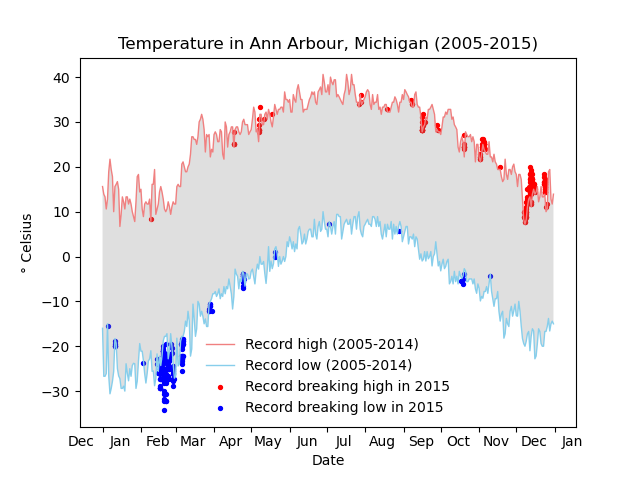

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.ticker as ticker
def leaflet_plot_stations():
    df = pd.read_csv('Ann_Arbor.csv')
    station_locations_by_hash = df[df['hash'] == 400]
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()
    plt.figure(figsize=(8,8))
    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    return lons


df = pd.read_csv('Ann_Arbor.csv')

df['Date']= pd.to_datetime(df['Date'])
df["Year"]=df["Date"].dt.year
df["Data_Value"]=df["Data_Value"]*0.1
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')
df = df[df['Month_Day']!='02-29']

DataMax=df[(df["Year"]<2015)&(df["Year"]>=2004)&(df["Element"]=="TMAX")].groupby("Month_Day").agg({"Data_Value": max}).reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'})
DataMin=df[(df["Year"]<2015)&(df["Year"]>=2004)&(df["Element"]=="TMIN")].groupby("Month_Day").agg({"Data_Value": min}).reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'})

df = df.merge(DataMax, on='Month_Day', how='left')
df = df.merge(DataMin, on='Month_Day', how='left')
DataMax2015=df[(df["Year"]==2015)&(df["Data_Value"]>df["Max_temp"])]
DataMin2015=df[(df["Year"]==2015)&(df["Data_Value"]<df["Min_temp"])]

date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

plt.figure()

plt.plot(date_index,DataMax['Max_temp'],color='lightcoral', linewidth=1) # Max in red.
plt.plot(date_index,DataMin['Min_temp'],color='skyblue', linewidth=1) # Min in blue.
plt.scatter(DataMax2015.Date.values, DataMax2015.Data_Value.values, color='red', s=8)
plt.scatter(DataMin2015.Date.values, DataMin2015.Data_Value.values, color='blue', s=8)

ax = plt.gca()
#ax.axis(['2015/01/01','2015/12/31',-50,50])
plt.xlabel('Date', fontsize=10)
plt.ylabel('° Celsius', fontsize=10)
plt.title('Temperature in Ann Arbour, Michigan (2005-2015)', fontsize=12)
plt.legend(['Record high (2005-2014)','Record low (2005-2014)','Record breaking high in 2015','Record breaking low in 2015'],loc=0,frameon=False)
ax.fill_between(date_index,DataMax['Max_temp'],DataMin['Min_temp'], facecolor='grey', alpha=0.25)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) # Put the label at the minor tick so it's in the center.
#ax.yaxis.set_minor_locator()
# What you put at the ticks:
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))



for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0) # Make small ticker disappear
    tick.label1.set_horizontalalignment('center')
